# Demo 1: Fallzahlen, Genesungen, und Todesfällen Vergleichen

## Importing Dependencies

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as wgts
from IPython.display import display
import numpy as np

## Loading Datasets

In [62]:
# test data read
covid_19_dataset = pd.read_csv('../dataset/cleaned_dataset.csv')
regions_dataset = pd.read_csv('../dataset/Countries by continents.csv')

## Creating Widgets

### Creating Countries & Continents Dropdown Menus

In [63]:
countries_dropdown_menu = wgts.Dropdown(
    options= regions_dataset['Country'].unique(),
    description='Country:',
    disabled=False,
)

continent_dropdown_menu = wgts.Dropdown(
    options= regions_dataset['Continent'].unique(),
    description='Continent:',
    disabled=False,
)

### Creating Regional Category Radio Button

In [64]:
regional_category_radio = wgts.RadioButtons(
    options=['Country', 'Region', 'World'],
    description='Regional Category:',
    disabled=False
)

### Creating Time Category Radio Button

In [65]:
time_category_radio = wgts.RadioButtons(
    options=['Daily', 'Weekly', 'Monthly', 'Yearly', 'Complete'],
    description='Time Category:',
    disabled=False
)

### Creating Months, Years Dropdown Menus & Day DatePicker

In [66]:
import datetime
# minimum date value in dataset
dateMin = datetime.datetime.strptime(covid_19_dataset['Date'].min(), '%Y-%m-%d').date()
# maximum date value in dataset
dateMax = datetime.datetime.strptime(covid_19_dataset['Date'].max(), '%Y-%m-%d').date()

day_datepicker = wgts.DatePicker(
    description='Day:',
    disabled=False,
    max=dateMax,
    min=dateMin
)

year_dropdown_menu = wgts.Dropdown(
    options= range(dateMin.year, dateMax.year + 1),
    description='Year:',
    disabled=False,
)

month_dropdown_menu = wgts.Dropdown(
    options= ["January", "February", "March", "April", "May", "June",
          "July", "August", "September", "October", "November", "December"],
    description='Month:',
    disabled=False,
)

### Creating Reload Button

In [67]:
reload_button = wgts.Button(
    description='Reload',
    disabled=False,
    button_style='info',
    tooltip='Reload',
    icon='check'
)

## Plotting Functions

Mexico values on 2020-10-08:
  Confirmed: 5300
  Recovered: 2911
  Deaths: 370

Mexico average across all days:
  Confirmed: 7017.98
  Recovered: 4761.05
  Deaths: 396.98

All countries average on 2020-10-08:
  Confirmed: 1813.90
  Recovered: 1129.87
  Deaths: 32.18


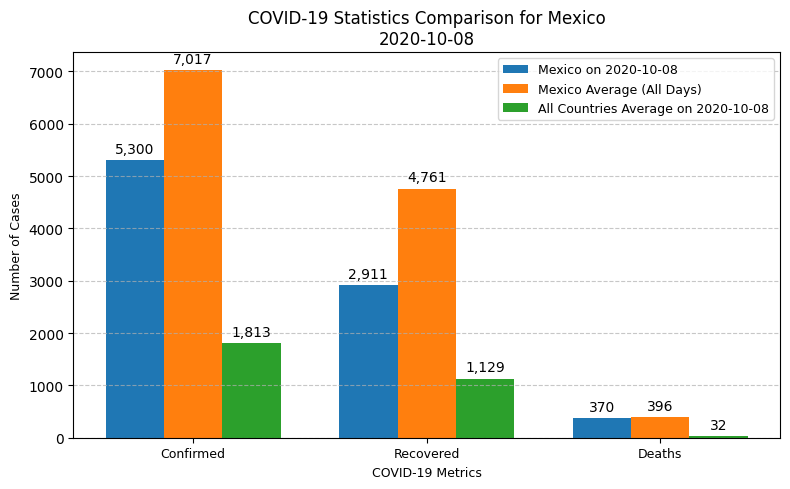

In [73]:
def plot_country_by_day(country:str, day:str):
    df = pd.DataFrame(covid_19_dataset)

    # Convert Date column to datetime
    df['Date'] = pd.to_datetime(df['Date'])

    # Target date
    target_date = day

    # 1. Get Country's data for the target date
    date_filter = df['Date'] == pd.to_datetime(target_date)
    target_df = df[date_filter]
    country_on_date = target_df[target_df['Country'] == country]
    country_date_values = country_on_date[['Confirmed', 'Recovered', 'Deaths']].values[0]

    # 2. Calculate average for Country across all days
    country_all_days = df[df['Country'] == country]
    country_avg_values = country_all_days[['Confirmed', 'Recovered', 'Deaths']].mean().values

    # 3. Calculate averages for all countries on the target date
    all_countries_date_avg = target_df[['Confirmed', 'Recovered', 'Deaths']].mean().values

    # Set up the plot
    categories = ['Confirmed', 'Recovered', 'Deaths']
    x = np.arange(len(categories))
    width = 0.25  # Narrower bars to fit three side by side

    fig, ax = plt.subplots(figsize=(8, 5))

    # Create the three sets of bars
    bar1 = ax.bar(x - width, country_date_values, width, label=f'{country} on {target_date}', color='#1f77b4')
    bar2 = ax.bar(x, country_avg_values, width, label=f'{country} Average (All Days)', color='#ff7f0e')
    bar3 = ax.bar(x + width, all_countries_date_avg, width, label=f'All Countries Average on {target_date}', color='#2ca02c')

    # Add labels, title and custom x-axis tick labels
    ax.set_xlabel('COVID-19 Metrics', fontsize=9)
    ax.set_ylabel('Number of Cases', fontsize=9)
    ax.set_title(f'COVID-19 Statistics Comparison for {country}\n{target_date}', fontsize=12)
    ax.set_xticks(x)
    ax.set_xticklabels(categories, fontsize=9)
    ax.legend(fontsize=9)

    # Add counts above bars
    def add_labels(bars):
        for bar in bars:
            height = bar.get_height()
            ax.annotate(f'{int(height):,}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)

    add_labels(bar1)
    add_labels(bar2)
    add_labels(bar3)

    # Add grid lines for better readability
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    # Print the numerical results for reference
    print(f"{country} values on {target_date}:")
    for category, value in zip(categories, country_date_values):
        print(f"  {category}: {value:.0f}")

    print(f"\n{country} average across all days:")
    for category, value in zip(categories, country_avg_values):
        print(f"  {category}: {value:.2f}")

    print(f"\nAll countries average on {target_date}:")
    for category, value in zip(categories, all_countries_date_avg):
        print(f"  {category}: {value:.2f}")

    plt.tight_layout()
    plt.show()

plot_country_by_day('Mexico', '2020-10-08')
